In [104]:
import networkx as nx
import statistics as st
import numpy as np
from enum import Enum
from collections import deque
from itertools import combinations
from typing import Type, TypeVar
np.set_printoptions(threshold=np.inf)

## State representation

### Full

In [91]:
colors = ['R', 'O', 'G', 'Y', 'B', 'W']
posible_color_pairs = [
    ('R', 'O'),
    ('R', 'G'),
    ('R', 'Y'),
    ('R', 'W'),
    ('O', 'G'),
    ('O', 'Y'),
    ('O', 'B'),
    ('G', 'B'),
    ('G', 'W'),
    ('Y', 'B'),
    ('Y', 'W'),
    ('B', 'W'),
]
nodes = [f'{c}{s}' for c in colors for s in range(9)]

edges = []

# edges inside side groups
for c in colors:
    for n in [(0,1,2), (3,4,5), (6,7,8), (0,3,6), (1,4,7), (2,5,8)]:
        edges = edges + [(f'{c}{n[0]}', f'{c}{n[1]}'), (f'{c}{n[1]}', f'{c}{n[2]}'),]

# horisontal relations
for i in [('R','W'), ('W','Y'), ('Y','B'), ('B','R')]:
    edges.append((f'{i[0]}2', f'{i[1]}0'))
    edges.append((f'{i[0]}5', f'{i[1]}3'))
    edges.append((f'{i[0]}8', f'{i[1]}6'))

# vertical relations
for i in [('G','W'), ('W','O')]:
    edges.append((f'{i[0]}6', f'{i[1]}0'))
    edges.append((f'{i[0]}7', f'{i[1]}1'))
    edges.append((f'{i[0]}8', f'{i[1]}2'))

edges.append(('O6', 'B8'))
edges.append(('O7', 'B7'))
edges.append(('O8', 'B6'))

edges.append(('B2', 'G0'))
edges.append(('B1', 'G1'))
edges.append(('B0', 'G2'))

# diagonal relations

edges.append(('R0', 'G0'))
edges.append(('R1', 'G3'))
edges.append(('R2', 'G6'))

edges.append(('G2', 'Y2'))
edges.append(('G5', 'Y1'))
edges.append(('G8', 'Y0'))

edges.append(('Y8', 'O8'))
edges.append(('Y7', 'O5'))
edges.append(('Y6', 'O2'))

edges.append(('O6', 'R6'))
edges.append(('O3', 'R7'))
edges.append(('O0', 'R8'))

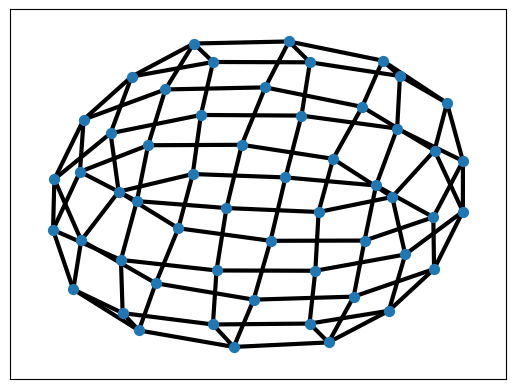

In [92]:
full = nx.Graph()
full.add_nodes_from(nodes)
full.add_edges_from(edges)
nx.draw_networkx(full, node_size=50, width=3.0, with_labels=False)

### Low

In [94]:
low = full.copy()

# horisontal
for i in [('R','W'), ('W','Y'), ('Y','B'), ('B','R')]:
    nx.contracted_nodes(low, f'{i[0]}5', f'{i[1]}3', self_loops=False, copy=False)
    nx.relabel_nodes(low, mapping={f'{i[0]}5': f'{i[0]}5/{i[1]}3'}, copy=False)

# vertical
for i in [('G','W'), ('W','O')]:
    nx.contracted_nodes(low, f'{i[0]}7', f'{i[1]}1', self_loops=False, copy=False)
    nx.relabel_nodes(low, mapping={f'{i[0]}7': f'{i[0]}7/{i[1]}1'}, copy=False)

nx.contracted_nodes(low, 'O7', 'B7', self_loops=False, copy=False)
nx.contracted_nodes(low, 'G1', 'B1', self_loops=False, copy=False)
nx.contracted_nodes(low, 'R7', 'O3', self_loops=False, copy=False)
nx.contracted_nodes(low, 'R1', 'G3', self_loops=False, copy=False)
nx.contracted_nodes(low, 'G5', 'Y1', self_loops=False, copy=False)
nx.contracted_nodes(low, 'O5', 'Y7', self_loops=False, copy=False)
nx.relabel_nodes(
    low,
    mapping={
        'O7': 'O7/B7',
        'G1': 'G1/B1',
        'R7': 'R7/O3',
        'R1': 'R7/G3',
        'G5': 'G5/Y1',
        'O5': 'O5/Y7',
    },
    copy=False
)

# diagonal
nx.contracted_nodes(low, 'R2', 'W0', self_loops=False, copy=False)
nx.contracted_nodes(low, 'R2', 'G6', self_loops=False, copy=False)
nx.contracted_nodes(low, 'R8', 'W6', self_loops=False, copy=False)
nx.contracted_nodes(low, 'R8', 'O0', self_loops=False, copy=False)
nx.contracted_nodes(low, 'G8', 'W2', self_loops=False, copy=False)
nx.contracted_nodes(low, 'G8', 'Y0', self_loops=False, copy=False)
nx.contracted_nodes(low, 'O2', 'W8', self_loops=False, copy=False)
nx.contracted_nodes(low, 'O2', 'Y6', self_loops=False, copy=False)
nx.contracted_nodes(low, 'G0', 'R0', self_loops=False, copy=False)
nx.contracted_nodes(low, 'G0', 'B2', self_loops=False, copy=False)
nx.contracted_nodes(low, 'G2', 'Y2', self_loops=False, copy=False)
nx.contracted_nodes(low, 'G2', 'B0', self_loops=False, copy=False)
nx.contracted_nodes(low, 'O6', 'R6', self_loops=False, copy=False)
nx.contracted_nodes(low, 'O6', 'B8', self_loops=False, copy=False)
nx.contracted_nodes(low, 'O8', 'Y8', self_loops=False, copy=False)
nx.contracted_nodes(low, 'O8', 'B6', self_loops=False, copy=False)

nx.relabel_nodes(
    low,
    mapping={
        'R2': 'R2/W0/G6',
        'R8': 'R8/W6/O0',
        'G8': 'G8/W2/Y0',
        'O2': 'O2/W8/Y6',
        'G0': 'G0/R0/B2',
        'G2': 'G2/Y2/B0',
        'O6': 'O6/R6/B8',
        'O8': 'O8/Y8/B6',
    },
    copy=False
)

In [95]:
list(low.nodes)

['R4',
 'O4',
 'G4',
 'Y4',
 'B4',
 'W4',
 'R5/W3',
 'W5/Y3',
 'Y5/B3',
 'B5/R3',
 'G7/W1',
 'W7/O1',
 'R7/G3',
 'R7/O3',
 'O5/Y7',
 'O7/B7',
 'G1/B1',
 'G5/Y1',
 'R2/W0/G6',
 'R8/W6/O0',
 'O2/W8/Y6',
 'O6/R6/B8',
 'O8/Y8/B6',
 'G0/R0/B2',
 'G2/Y2/B0',
 'G8/W2/Y0']

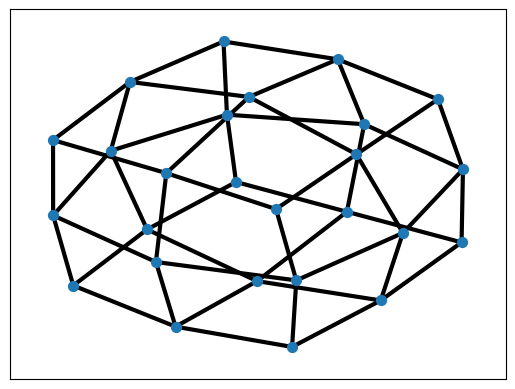

In [96]:
nx.draw_networkx(low, node_size=50, width=3.0, with_labels=False)

### Stats

In [97]:
def met(m: str, f, l) -> str:
    print(f'{m}: full - {f}, low - {l}')

met('Nodes', full.number_of_nodes(), low.number_of_nodes())
met('Edges', full.number_of_edges(), low.number_of_edges())
met('Dencity', nx.density(full), nx.density(low))
met('Diameter', nx.diameter(full), nx.diameter(low))
met('Clustering coef', nx.average_clustering(full), nx.average_clustering(low))
met('Degree', nx.average_degree_connectivity(full), nx.average_degree_connectivity(low))

Nodes: full - 54, low - 26
Edges: full - 108, low - 48
Dencity: full - 0.07547169811320754, low - 0.1476923076923077
Diameter: full - 8, low - 6
Clustering coef: full - 0.07407407407407404, low - 0.0
Degree: full - {4: 4.0}, low - {4: 3.6666666666666665, 3: 4.0}


## Actions representation

### Actions as sequence

In [98]:
actions_seq = [
    ('W4')
]

['R4',
 'O4',
 'G4',
 'Y4',
 'B4',
 'W4',
 'R5/W3',
 'W5/Y3',
 'Y5/B3',
 'B5/R3',
 'G7/W1',
 'W7/O1',
 'R7/G3',
 'R7/O3',
 'O5/Y7',
 'O7/B7',
 'G1/B1',
 'G5/Y1',
 'R2/W0/G6',
 'R8/W6/O0',
 'O2/W8/Y6',
 'O6/R6/B8',
 'O8/Y8/B6',
 'G0/R0/B2',
 'G2/Y2/B0',
 'G8/W2/Y0']

['R4',
 'O4',
 'G4',
 'Y4',
 'B4',
 'W4',
 'R5/W3',
 'W5/Y3',
 'Y5/B3',
 'B5/R3',
 'G7/W1',
 'W7/O1',
 'R7/G3',
 'R7/O3',
 'O5/Y7',
 'O7/B7',
 'G1/B1',
 'G5/Y1',
 'R2/W0/G6',
 'R8/W6/O0',
 'O2/W8/Y6',
 'O6/R6/B8',
 'O8/Y8/B6',
 'G0/R0/B2',
 'G2/Y2/B0',
 'G8/W2/Y0']

## Class based

In [124]:
T = TypeVar('T', bound=Enum)


class BaseEnum(str, Enum):

    @classmethod
    def has_value(cls: Type[T], value: str) -> bool:
        return value in cls._value2member_map_

    @classmethod
    def get_values(cls: Type[T]) -> list[str]:
        return [e.value for e in cls]

    @classmethod
    def get_names(cls: Type[T]) -> list[T]:
        return [e for e in cls]


class Colors(BaseEnum):
    BLUE = 'B'
    GREEN = 'G'
    ORANGE = 'O'
    RED = 'R'
    WHITE = 'W'
    YELLOW = 'Y'


class Point:

    def __init__(self, colors: list[Colors]) -> None:
        self.colors = colors

    def __hash__(self):
        return hash((type(self),) + tuple(self.__dict__.values()))

    def __eq__(self, __value: object) -> bool:
        return super().__eq__(__value)

    def __repr__(self) -> str:
         return '_'.join([i.value for i in self.colors])


class Layer:

    def __init__(self) -> None:
        self.layer: deque[tuple[Point, Point]] = deque(maxlen=4)

    def add_pair(self, p1: Point, p2: Point) -> None:
        self.layer.append((p1, p2))

    def forward(self) -> None:
            self.layer.appendleft(self.layer.pop())

    def backward(self) -> None:
            self.layer.append(self.layer.popleft())


class Cube:

    def __init__(self) -> None:
        self.x_left = Layer()
        self.x_center = Layer()
        self.x_right = Layer()
        self.y_left = Layer()
        self.y_center = Layer()
        self.y_right = Layer()
        self.z_left = Layer()
        self.z_center = Layer()
        self.z_right = Layer()
        self.one = {v.value: Point([v]) for v in Colors.get_names()}
        self.two = {
            ''.join(i.value for i in v): Point(list(v))
            for v in combinations(Colors.get_names(), 2)
        }
        self.three = {
            ''.join(i.value for i in v): Point(list(v))
            for v in combinations(Colors.get_names(), 3)
        }

    def _rotate_random(self, how_much: int) -> None:
        """
        """

    def set_complete(self) -> None:
        """Complete cube
        """

    def set_random(self) -> None:
        """
        """

    def reset(self) -> None:
        """Reset cube state
        """
        self.__init__()

    def _track(self) -> None:
        """
        """

    def track_graph(self) -> None:
        """
        """



In [126]:
cube = Cube()
one = {v: Point([v]) for v in Colors.get_names()}
two = {v: Point(list(v)) for v in combinations(Colors.get_names(), 2)}
tree = {v: Point(list(v)) for v in combinations(Colors.get_names(), 3)}

print(one)
print(two)
print(tree)

{<Colors.RED: 'red'>: red, <Colors.ORANGE: 'orange'>: orange, <Colors.GREEN: 'green'>: green, <Colors.YELLOW: 'yellow'>: yellow, <Colors.BLUE: 'blue'>: blue, <Colors.WHITE: 'white'>: white}
{(<Colors.RED: 'red'>, <Colors.ORANGE: 'orange'>): red_orange, (<Colors.RED: 'red'>, <Colors.GREEN: 'green'>): red_green, (<Colors.RED: 'red'>, <Colors.YELLOW: 'yellow'>): red_yellow, (<Colors.RED: 'red'>, <Colors.BLUE: 'blue'>): red_blue, (<Colors.RED: 'red'>, <Colors.WHITE: 'white'>): red_white, (<Colors.ORANGE: 'orange'>, <Colors.GREEN: 'green'>): orange_green, (<Colors.ORANGE: 'orange'>, <Colors.YELLOW: 'yellow'>): orange_yellow, (<Colors.ORANGE: 'orange'>, <Colors.BLUE: 'blue'>): orange_blue, (<Colors.ORANGE: 'orange'>, <Colors.WHITE: 'white'>): orange_white, (<Colors.GREEN: 'green'>, <Colors.YELLOW: 'yellow'>): green_yellow, (<Colors.GREEN: 'green'>, <Colors.BLUE: 'blue'>): green_blue, (<Colors.GREEN: 'green'>, <Colors.WHITE: 'white'>): green_white, (<Colors.YELLOW: 'yellow'>, <Colors.BLUE: 'b